### Let us start by importing our dependencies

In [3]:
import pandas as pd
import numpy as np
from config import api_key
import requests
import json
import scipy.stats as stats
import matplotlib.pyplot as plt

### In order to answer our questions, we had to look far and wide in order to find data that we could work with!

### Brian looked up information on the [Great American Beer Festival](https://www.greatamericanbeerfestival.com/the-competition/about-the-beer-competition/?fbclid=IwAR34qraQ09Z157dZ78IpMEiVfj8KarPCJMzHOZr5195ne62gafbYBL8wyRQ) that he painstakingly compiled into an Excel spreadsheet.

In [4]:
# Create a dataframe of all award-winning beers since 2009
csv_data = "beer_winners.csv"

all = pd.read_csv(csv_data)
all.columns = ['medal', 'beer_name','brewery',
                       'city','county','state',
                       'category','year','total_category_entries']
all = all.sort_values('year', ascending=False)
all.reset_index(inplace=True)
all_winner_data = all.drop(columns=['index'],axis=1)
print("This is a dataframe with every award-winning beer brewed in the United States since 2009.")
us_number = all_winner_data['medal'].count()
print(f'There is information on {us_number} beers in this dataframe.')
all_winner_data.head()

This is a dataframe with every award-winning beer brewed in the United States since 2009.
There is information on 2646 beers in this dataframe.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries
0,Bronze,Eclipse,FiftyFifty Brewing Co.,Truckee,Nevada,CA,Wood- and Barrel-Aged Strong Stout,2018,177
1,Silver,Märzen,Sudwerk Brewing Co.,Davis,Yolo,CA,American-Style Amber Lager,2018,91
2,Gold,Oktoberfest,SKA Brewing,Durango,La Plata,CO,Vienna-Style Lager,2018,92
3,Gold,Barrel Aged Japance Off,Denver Beer Co. - Olde Town Arvada,Arvada,Jefferson,CO,Wood- and Barrel-Aged Beer,2018,77
4,Gold,3 Barrel Circus,River Dog Brewing Co.,Bluffton,Yell,SC,Wood- and Barrel-Aged Sour Beer,2018,76


### Plot 1 - Total National Entries Over the Past 10 Years

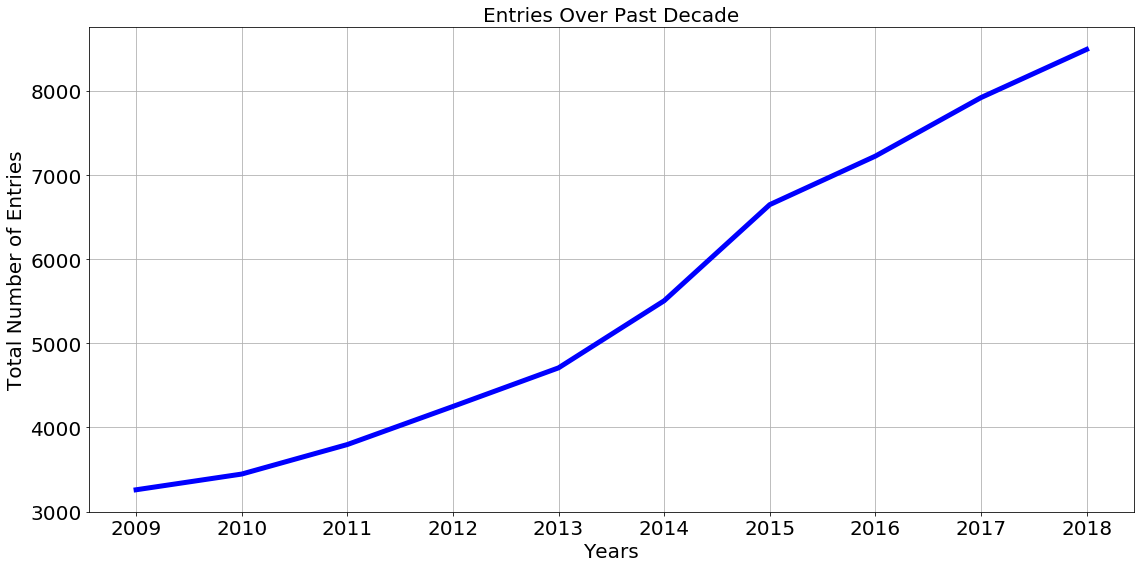

In [5]:
df = all_winner_data

# Adding "key" column to remove dupes for total entries per year
df["key"] = df["category"] + df["year"].map(str)
unq_entry_count = df.drop_duplicates(subset="key", keep="first")
year_grp = unq_entry_count.groupby("year")

entries_sum = year_grp["total_category_entries"].sum()
year = year_grp["year"].unique()

x_axis = year
y_axis = entries_sum
tick_locs = []
for x in x_axis:
    tick_locs.append(x)

plt.figure(figsize=(16,8))
plt.plot(x_axis, y_axis, color="blue", linewidth=5)

plt.xticks(tick_locs, size=20)
plt.yticks(size=20)
plt.title("Entries Over Past Decade", size=20)
plt.xlabel("Years", size=20)
plt.ylabel("Total Number of Entries", size=20)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot 2 - Categories Over the Past 10 Years

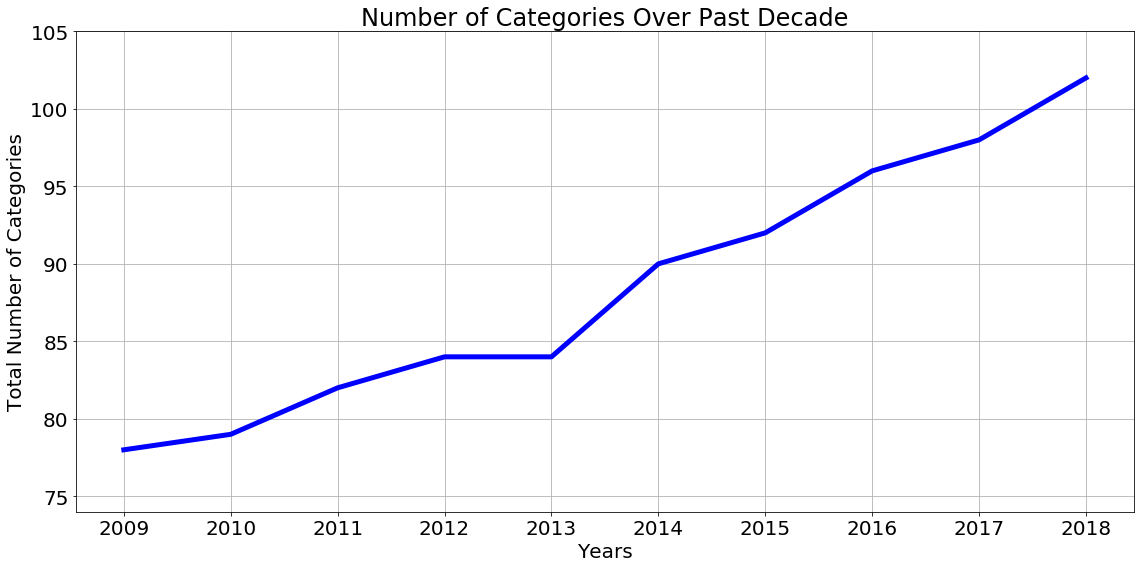

In [117]:
category_count = year_grp["category"].count()
y_axis = category_count
plt.figure(figsize=(16,8))
plt.plot(x_axis, y_axis, color="blue", linewidth=5)

plt.xticks(tick_locs, size=20)
plt.yticks(size=20)
plt.title("Number of Categories Over Past Decade", size=24)
plt.xlabel("Years", size=20)
plt.ylabel("Total Number of Categories", size=20)
plt.ylim(74, 105)
plt.grid(True)
plt.tight_layout()
plt.show()

### But enough about beers on the national level. Let's start narrowing our focus a bit here...
### How many beers brewed in California have won a medal?

In [6]:
ca = all_winner_data[all_winner_data['state'] == 'CA']
ca.reset_index(inplace=True)

ca_number = ca['index'].count()
print(f'There have been {ca_number} award-winning* beers in California in the last decade.')

cal_data = ca.drop(columns=['index'],axis=1)
cal_data = cal_data.sort_values('year', ascending=False)
cal_data.reset_index(inplace=True)
cal_data = cal_data.drop(columns=['index'],axis=1)
cal_data.head()

There have been 553 award-winning* beers in California in the last decade.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries,key
0,Bronze,Eclipse,FiftyFifty Brewing Co.,Truckee,Nevada,CA,Wood- and Barrel-Aged Strong Stout,2018,177,Wood- and Barrel-Aged Strong Stout2018
1,Bronze,Nighthawk,Enegren Brewing Co.,Moorpark,Ventura,CA,Dark Lager,2018,62,Dark Lager2018
2,Silver,Sour Cherry Sour,Hermitage Brewing Co.,San Jose,Graham,CA,Fruited Wood- and Barrel-Aged Sour Beer,2018,102,Fruited Wood- and Barrel-Aged Sour Beer2018
3,Bronze,Kumquat Saison,Smog City Brewing Wood Cellar,Torrance,Los Angeles,CA,Belgian-Style Fruit Beer,2018,65,Belgian-Style Fruit Beer2018
4,Silver,The Shroud,Bravery Brewing,Lancaster,Los Angeles,CA,Imperial Stout,2018,86,Imperial Stout2018


### Finally, we get to the interesting stuff!
### How many beers brewed in San Diego have won a medal?

In [12]:
temp = cal_data[cal_data['county'] == 'San Diego']
temp.reset_index(inplace=True)
sd_number = temp['index'].count()
print(f'There have been {sd_number} award-winning* beers in San Diego in the last decade.')
sd_data = temp.drop(columns=['index'], axis=1)
sd_data = sd_data.sort_values('year', ascending=False)
sd_data.reset_index(inplace=True)
sd_data = sd_data.drop(columns=['index'],axis=1)
sd_data.head()

There have been 148 award-winning* beers in San Diego in the last decade.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries,key
0,Silver,Oats,Pizza Port Solana Beach,Solana Beach,San Diego,CA,Oatmeal Stout,2018,59,Oatmeal Stout2018
1,Gold,Natural Bridge: Vienna Lager,Eppig Brewing,San Diego,San Diego,CA,Session Beer,2018,50,Session Beer2018
2,Gold,Liquid AC,Karl Strauss Brewing Co. - La Jolla,La Jolla,San Diego,CA,English-Style Summer Ale,2018,61,English-Style Summer Ale2018
3,Bronze,Bird Park,North Park Beer Co.,San Diego,San Diego,CA,Bohemian-Style Pilsener,2018,84,Bohemian-Style Pilsener2018
4,Bronze,Chocolate Macadamia Nut Stout,Kilowatt Brewing,San Diego,San Diego,CA,Chocolate Beer,2018,59,Chocolate Beer2018


### In terms of medals won, what are the top 5 breweries in California?

In [13]:
medals_cal = cal_data.groupby(['brewery'])['medal'].count()
top_brew_cal = medals_cal.sort_values(ascending=False)
top_5_cal = top_brew_cal.head()
cc = pd.DataFrame(top_5_cal)
top_5_cal_df = cc.rename(index=str, columns={"medal": "medal count"})
top_5_cal_df.reset_index()

,brewery,medal count
0,Firestone Walker Brewing Co.,28
1,Pizza Port Carlsbad,24
2,Pabst Brewing Co.,12
3,Pizza Port Ocean Beach,12
4,Beachwood BBQ & Brewing,11


### In terms of medals won, what are the top 5 breweries in San Diego?

In [14]:
medals_sd = sd_data.groupby(['brewery'])['medal'].count()
top_brew_sd = medals_sd.sort_values(ascending=False)
top_5_sd = top_brew_sd.head()
zz = pd.DataFrame(top_5_sd)
top_5_sd_df = zz.rename(index=str, columns={"medal": "medal count"})
top_5_sd_df.reset_index()

,brewery,medal count
0,Pizza Port Carlsbad,24
1,AleSmith Brewing Co.,10
2,The Lost Abbey,9
3,Pizza Port Solana Beach,8
4,Pizza Port Ocean Beach,7





### Why is there a discrepancy between the San Diego list and the California list?
#### Let's find out!




In [15]:
pizza_port = all_winner_data[all_winner_data['brewery'] == 'Pizza Port Ocean Beach']
pizza_port = pizza_port.sort_values('year', ascending=False)
pizza_port.reset_index(inplace=True)
pizza_port = pizza_port.drop(columns=['index'],axis=1)
pizza_port

,medal,beer_name,brewery,city,county,state,category,year,total_category_entries,key
0,Gold,Guillaume,Pizza Port Ocean Beach,San Diego,San Diego,CA,Session Beer,2017,40,Session Beer2017
1,Bronze,Bacon and Eggs,Pizza Port Ocean Beach,San Diego,San Diego,CA,Coffee Beer,2015,149,Coffee Beer2015
2,Bronze,Guillaume,Pizza Port Ocean Beach,San Diego,San Diego,CA,Session Beer,2015,44,Session Beer2015
3,Silver,Guillaume,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Session Beer,2014,94,Session Beer2014
4,Bronze,La Flama Dorada,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Belgian-Style Tripel,2014,58,Belgian-Style Tripel2014
5,Gold,Beer Hunter,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Session Beer,2013,56,Session Beer2013
6,Silver,Rhino Chaser,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Imperial Red Ale,2013,56,Imperial Red Ale2013
7,Bronze,Kung Fu Elvis,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,American-Style Strong Pale Ale,2013,120,American-Style Strong Pale Ale2013
8,Gold,Skidmark Brown Ale,Pizza Port Ocean Beach,San Diego,San Diego,CA,English-Style Mild Ale,2011,25,English-Style Mild Ale2011
9,Bronze,Z-Man Stout,Pizza Port Ocean Beach,San Diego,San Diego,CA,Foreign-Style Stout,2011,23,Foreign-Style Stout2011


#### From 2013 to 2014, we hypothesize that the incorrect [Ocean Beach](https://en.wikipedia.org/wiki/Ocean_Beach,_New_York) was used to label the medal-winning beer's origin.
#### As we can see, input error can throw off our numbers, which will then throw off our calculations.

### Now just for fun,
### What are the top 5 breweries in the United States?

In [25]:
medals_us = all_winner_data.groupby(['brewery'])['medal'].count()
top_brew_us = medals_us.sort_values(ascending=False)
top_5_us = top_brew_us.head()
vv = pd.DataFrame(top_5_us)

top_5_us_df = vv.rename(index=str, columns={"medal": "medal count"})
top_5_us_df.reset_index()

,brewery,medal count
0,Firestone Walker Brewing Co.,28
1,Pizza Port Carlsbad,24
2,Sun King Brewing Co.,19
3,Pabst Brewing Co.,19
4,Chuckanut Brewery,18


#### Plot 3 - Every Category that Pizza Port Carlsbad has Earned a Medal In

In [18]:
carl = all_winner_data.loc[all_winner_data['brewery'] == 'Pizza Port Carlsbad']
carls = carl.groupby(['category'])['medal']
carlsb = carls.count()
carlsba = pd.DataFrame(carlsb)
carlsbad = carlsba.reset_index()
carlsbad
# labels = carlsbad['category']
# medals = carlsbad['medal']
# explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0)
# plt.figure(figsize=(24,12))
# plt.pie(medals, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)
# plt.title("Breakdown of\n" + "Medals Earned by\n" + "Pizza Port Carlsbad")
# plt.show()

,category,medal
0,American Style Brown Ale,1
1,American-Style Brown Ale,1
2,Belgian Style Strong Specialty Ale,1
3,Belgian-Style Strong Specialty Ale,2
4,Classic Irish-Style Dry Stout,1
5,Coffee Beer,1
6,Coffee Flavored Beer,1
7,English Style Brown Ale,1
8,English-Style Brown Ale,2
9,English-Style India Pale Ale,2


#### We need to combine categories in order to get a more accurate breakdown of Pizza Port Carlsbad's accomplishments

In [33]:
carlsbad = carlsbad.replace({"American Style Brown Ale": "American-Style Brown Ale",
                            "Belgian Style Strong Specialty Ale": "Belgian-Style Strong Specialty Ale",
                            "Coffee Flavored Beer": "Coffee Beer",
                            "English Style Brown Ale": "English-Style Brown Ale"})
carlsbad
carlsbad2 = carlsbad.groupby(['category'])['medal'].count()
carlsbad3 = pd.DataFrame(carlsbad2)
carlsbad4 = carlsbad3.reset_index()
carlsbad_df = carlsbad4.sort_values('medal', ascending=False)
carlsbad_df

,category,medal
0,American-Style Brown Ale,2
1,Belgian-Style Strong Specialty Ale,2
3,Coffee Beer,2
4,English-Style Brown Ale,2
2,Classic Irish-Style Dry Stout,1
5,English-Style India Pale Ale,1
6,Export Stout,1
7,Imperial Red Ale,1
8,Imperial Stout,1
9,Scotch Ale,1


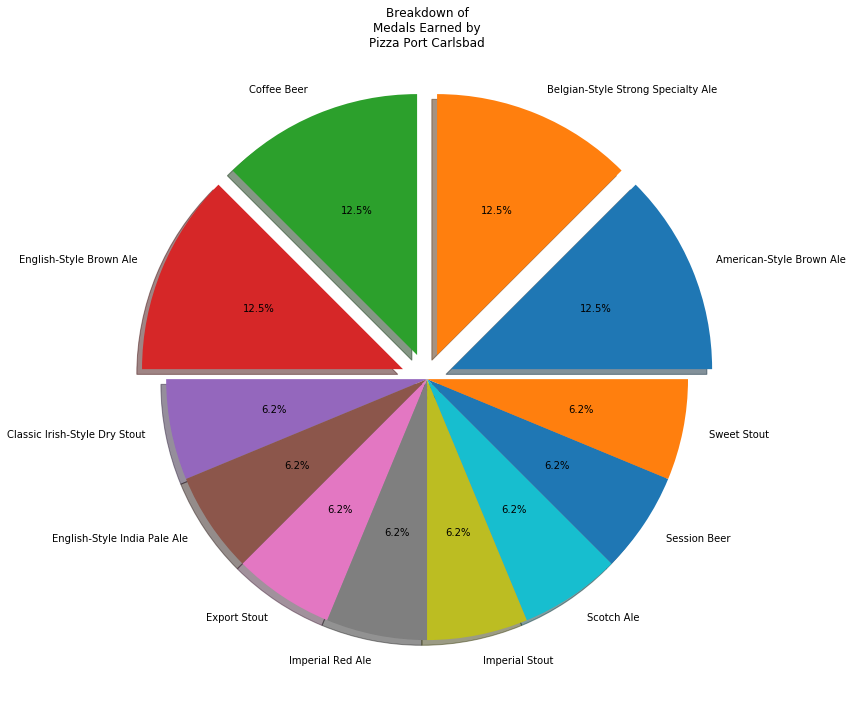

In [36]:
labels = carlsbad_df['category']
medals = carlsbad_df['medal']
explode = (0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(24,12))
plt.pie(medals, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Breakdown of\n" + "Medals Earned by\n" + "Pizza Port Carlsbad")
plt.show()

#### Breakdown of medals won from San Diego breweries

In [27]:
sd_df = medals_df[['SD medals won', 'SD expected']]
sd_df

,SD medals won,SD expected
medal,,
Bronze,49,49
Gold,58,49
Silver,41,49


#### Chi-Square Test - San Diego

In [28]:
crit_sd = stats.chi2.ppf(q = 0.95, df = 2)
print(f'The critical value for medal frequency is {crit_sd}')
stats.chisquare(sd_df['SD medals won'], sd_df['SD expected'])

The critical value for medal frequency is 5.991464547107979


Power_divergenceResult(statistic=2.9591836734693877, pvalue=0.2277306206904969)

### Conclusion
* Since the chi-square value of 2.96 at a confidence level of 95% does not exceed the critical value of 5.99, we conclude that the differences seen in the number of wins per medal are not statistically significant.
* If you were handed a randomly-chosen award-winning beer in San Diego, CA, it is just as likely to be a gold-medal beer as a bronze-medal beer.


#### Breakdown of medals won from California breweries

In [29]:
ca_df = medals_df[['CA medals won', 'CA expected']]
ca_df

,CA medals won,CA expected
medal,,
Bronze,186,184
Gold,185,184
Silver,182,184


#### Chi-Square Test - California

In [30]:
crit_ca = stats.chi2.ppf(q = 0.95, df = 2)
print(f'The critical value for medal frequency is {crit_ca}')
stats.chisquare(ca_df['CA medals won'], ca_df['CA expected'])

The critical value for medal frequency is 5.991464547107979


Power_divergenceResult(statistic=0.048913043478260865, pvalue=0.9758401158271994)

### Conclusion
* Since the chi-square value of 0.05 at a confidence level of 95% does not exceed the critical value of 5.99, we conclude that the differences seen in the number of wins per medal are not statistically significant.
* With a p-value of 0.976, the distribution of medals won throughout all of California is roughly [uniform](http://mathworld.wolfram.com/UniformDistribution.html).
* If you were handed a randomly-chosen award-winning beer from California, there is a 1/3 chance of it winning a gold medal, a 1/3 chance of it winning a silver medal, and a 1/3 chance of it winning a bronze medal.


#### Breakdown of medals won from all breweries in the United States

In [31]:
us_df = medals_df[['All US won', 'US expected']]
us_df

,All US won,US expected
medal,,
Bronze,886,882
Gold,878,882
Silver,882,882


#### Chi-Square Test - United States

In [38]:
crit_us = stats.chi2.ppf(q = 0.95, df = 2)
print(f'The critical value for medal frequency is {crit_us}')
stats.chisquare(us_df['All US won'], us_df['US expected'])

The critical value for medal frequency is 5.991464547107979


Power_divergenceResult(statistic=0.036281179138321996, pvalue=0.982022960467876)

### Conclusion
* Since the chi-square value of 0.05 at a confidence level of 95% does not exceed the critical value of 5.99, we conclude that the differences seen in the number of wins per medal are not statistically significant.
* With a p-value of 0.982, the distribution of medals won throughout all of the United States is roughly [uniform](http://mathworld.wolfram.com/UniformDistribution.html).
* A randomly-selected medal-winning beer brewed within the United States has an even chance of being either a gold medal, a silver medal, or a bronze medal.

In [116]:
# Possibly a line graph? Or scatter-plot?

total_entries_us = all_winner_data.groupby(['year'])['total_category_entries'].count()
print('total US entries')
print(total_entries_us)
total_entries_cal = cal_data.groupby(['year'])['total_category_entries'].count()
print("")
print('total CA entries')
print(total_entries_cal)
total_entries_sd = sd_data.groupby(['year'])['total_category_entries'].count()
print("")
print('total SD entries')
print(total_entries_sd)

total US entries
year
2009    234
2010    236
2011    248
2012    251
2013    249
2014    268
2015    275
2016    286
2017    293
2018    306
Name: total_category_entries, dtype: int64

total CA entries
year
2009    39
2010    52
2011    51
2012    49
2013    52
2014    46
2015    67
2016    68
2017    57
2018    72
Name: total_category_entries, dtype: int64

total SD entries
year
2009    14
2010    15
2011    18
2012    14
2013     8
2014    12
2015    19
2016    18
2017    14
2018    16
Name: total_category_entries, dtype: int64


In [119]:
# List of all award-winning beers in 2018
# Any ides for visualization and/or story-telling?

bweh = sd_data.loc[sd_data['year'] == 2018]
sd_2018 = bweh[['medal', 'beer_name', 'brewery', 'category', 'total_category_entries']]
sd_2018

,medal,beer_name,brewery,category,total_category_entries
0,Gold,The Coachman,Societe Brewing Co.,Session India Pale Ale,92
1,Silver,Oats,Pizza Port Solana Beach,Oatmeal Stout,59
2,Silver,Duck Duck Gooze,Port Brewing Co. / The Lost Abbey,Wood- and Barrel-Aged Sour Beer,76
3,Silver,Redrum,Duck Foot Brewing Co.,Wood- and Barrel-Aged Beer,77
4,Silver,Noble Miner,Burgeon Beer Co.,Session Beer,50
5,Bronze,Bird Park,North Park Beer Co.,Bohemian-Style Pilsener,84
6,Bronze,Know Ego,Groundswell Brewing Co.,Classic Irish-Style Dry Stout,54
7,Bronze,Rail Gun Wee Heavy,BNS Brewing & Distilling Co.,Old Ale or Strong Ale,37
8,Silver,Delaminator Doppelbock,Rip Current Brewery,German-Style Doppelbock or Eisbock,31
9,Bronze,Zungen Brecher,Home Brewing Co.,Historical Beer,38


In [145]:
top_brew_sd
# ale = pd.DataFrame(top_brew_sd)
# pie_list = ale.replace(
#     {"Monkey Paw Brewing Co.": "Other",
#      "Kilowatt Brewing": "Other",
#         "Monkey Paw Brewing": "Other",
#         "Mother Earth Brew Co.": "Other",
#         "North Park Beer Co.": "Other",
#         "OB Brewery": "Other",
#         "Ocean Beach Brewery": "Other",
#         "Oceanside Ale Works": "Other",
#         "Pizza Port Bressi Ranch": "Other",
#         "Port Brewing Co. / The Lost Abbey": "Other",
#         "Pure Project": "Other",
#         "Rock Bottom Brewery - La Jolla": "Other",
#         "Saint Archer Brewing Co.": "Other",
#         "South Park Brewing - CA": "Other",
#         "SouthNorte Beer Co.": "Other",
#         "The Beer Co.": "Other",
#         "Karl Strauss Brewing Co. - Carlsbad": "Other",
#         "Home Brewing Co.": "Other",
#         "URBN St. Brewing Co.": "Other",
#         "BNS Brewing & Distilling Co.": "Other",
#         "Rip Current Brewery": "Other",
#         "Karl Strauss Brewing Co. - La Jolla": "Other",
#         "Karl Strauss Brewing Co.": "Other",
#         "Societe Brewing Co.": "Other",
#         "Ballast Point Brewing & Spirits - Scripps Ranch": "Other",
#         "Stone Brewing World Bistro & Gardens - Liberty Station": "Other",
#         "Bagby Beer Co.": "Other",
#         "Breakwater Brewing Co.": "Other",
#         "Second Chance Beer Co.": "Other",
#         "Karl Strauss Brewing Co. - San Diego": "Other",
#         "Benchmark Brewing Co.": "Other",
#         "Duck Foot Brewing Co.": "Other",
#         "Stone Brewing Co.": "Other",
#         "Groundswell Brewing Co.": "Other",
#         "Ballast Point Brewing Co.": "Other",
#         "New English Brewing Co.": "Other",
#         "Culture Brewing Co.": "Other",
#         "Eppig Brewing": "Other",
#         "Ballast Point Brewing Co": "Other",
#         "Alpine Beer Co.": "Other",
#         "Coronado Brewing Company Brewpub": "Other",
#         "Brit Antrim Benefit Beer Pizza Port Ocean Beach": "Other",
#         "Ballast Point Brewing Co. - Home Brew Mart": "Other", "Burgeon Beer Co.": "Other"})

# ale

brewery
Pizza Port Carlsbad                                       24
AleSmith Brewing Co.                                      10
The Lost Abbey                                             9
Pizza Port Solana Beach                                    8
Pizza Port Ocean Beach                                     7
Green Flash Brewing Co.                                    6
Port Brewing Co.                                           6
BNS Brewing & Distilling Co.                               4
Rip Current Brewery                                        4
Karl Strauss Brewing Co. - La Jolla                        4
Karl Strauss Brewing Co.                                   4
Societe Brewing Co.                                        4
Ballast Point Brewing & Spirits - Scripps Ranch            3
Stone Brewing World Bistro & Gardens - Liberty Station     3
Bagby Beer Co.                                             3
Breakwater Brewing Co.                                     3
Second Chance Be

In [146]:
# POSSIBLE DATA VISUALIZATION FOR THIS LIST?
# ***How many award-winning beers does each brewery have?***

# Maybe a pie chart showing the medal breakdown of SD breweries?
# Or a pie chart showing the top 5-7 breweries, with all the others listed as "Other"

# Maybe combine similar names (i.e. "Ballast Point Brewing Co" and "Ballast Point Brewing Co.")